#### Performing QC, dim reduction and clustering on GSE213243 
##### This was initially performed with KT, repeating hear to check understanding and for records
Before the below point GSE213243 files were unzipped with tar -xvf and renamed correctly. Only completing analysis on tumour here, but dataset also contains ascites and pbmc

The below analysis is based on that done in the Seurat tutorial

In [2]:
#set wd
getwd()
setwd('/scratch/user/s4436039/scdata/GSE213243/S1_tumour')
getwd()

[1] "/scratch/user/s4436039/scdata/GSE213243/S1_tumour"

[1] "/scratch/user/s4436039/scdata/GSE213243/S1_tumour"

In [3]:
#Load packages
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect




In [4]:
#load dataset
OC.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE213243/S1_tumour")

In [5]:
#Add dataset info to colnames
colnames(OC.data) <- paste0("GSE213243_S1_tumour_", colnames(OC.data))

In [6]:
head(colnames(OC.data))

[1] "GSE213243_S1_tumour_AAACCCAAGCATGTTC-1"
[2] "GSE213243_S1_tumour_AAACCCACAAGCAATA-1"
[3] "GSE213243_S1_tumour_AAACCCAGTCGTCAGC-1"
[4] "GSE213243_S1_tumour_AAACCCAGTGACGTCC-1"
[5] "GSE213243_S1_tumour_AAACCCATCACAAGAA-1"
[6] "GSE213243_S1_tumour_AAACCCATCCGTATAG-1"

In [7]:
#Initialise the Seurat object
OC <- CreateSeuratObject(counts = OC.data, project = "GSE213243", min.features = 200)

#add metadata to sample
OC@meta.data$sample_type <- "tumour"
OC@meta.data$cancer_type <- "HGSOC"
OC@meta.data$patient_id <- "S1_tumour"
OC@meta.data$sample_id <- "GSE213243_HGSOC_S1_tumour"

In [8]:
head(OC@meta.data) 

orig.ident nCount_RNA nFeature_RNA
GSE213243_S1_tumour_AAACCCAAGCATGTTC-1 GSE213243    662       511        
GSE213243_S1_tumour_AAACCCACAAGCAATA-1 GSE213243  32154      5908        
GSE213243_S1_tumour_AAACCCAGTCGTCAGC-1 GSE213243  12781      4054        
GSE213243_S1_tumour_AAACCCAGTGACGTCC-1 GSE213243    557       402        
GSE213243_S1_tumour_AAACCCATCACAAGAA-1 GSE213243  20367      5210        
GSE213243_S1_tumour_AAACCCATCCGTATAG-1 GSE213243   7222      2839        
                                       sample_type cancer_type patient_id
GSE213243_S1_tumour_AAACCCAAGCATGTTC-1 tumour      HGSOC       S1_tumour 
GSE213243_S1_tumour_AAACCCACAAGCAATA-1 tumour      HGSOC       S1_tumour 
GSE213243_S1_tumour_AAACCCAGTCGTCAGC-1 tumour      HGSOC       S1_tumour 
GSE213243_S1_tumour_AAACCCAGTGACGTCC-1 tumour      HGSOC       S1_tumour 
GSE213243_S1_tumour_AAACCCATCACAAGAA-1 tumour      HGSOC       S1_tumour 
GSE213243_S1_tumour_AAACCCATCCGTATAG-1 tumour      HGSOC       S1_tumour 
                                       sample_id                
GSE213243_S1_tumour_AAACCCAAGCATGTTC-1 GSE213243_HGSOC_S1_tumour
GSE213243_S1_tumour_AAACCCACAAGCAATA-1 GSE213243_HGSOC_S1_tumour
GSE213243_S1_tumour_AAACCCAGTCGTCAGC-1 GSE213243_HGSOC_S1_tumour
GSE213243_S1_tumour_AAACCCAGTGACGTCC-1 GSE213243_HGSOC_S1_tumour
GSE213243_S1_tumour_AAACCCATCACAAGAA-1 GSE213243_HGSOC_S1_tumour
GSE213243_S1_tumour_AAACCCATCCGTATAG-1 GSE213243_HGSOC_S1_tumour

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


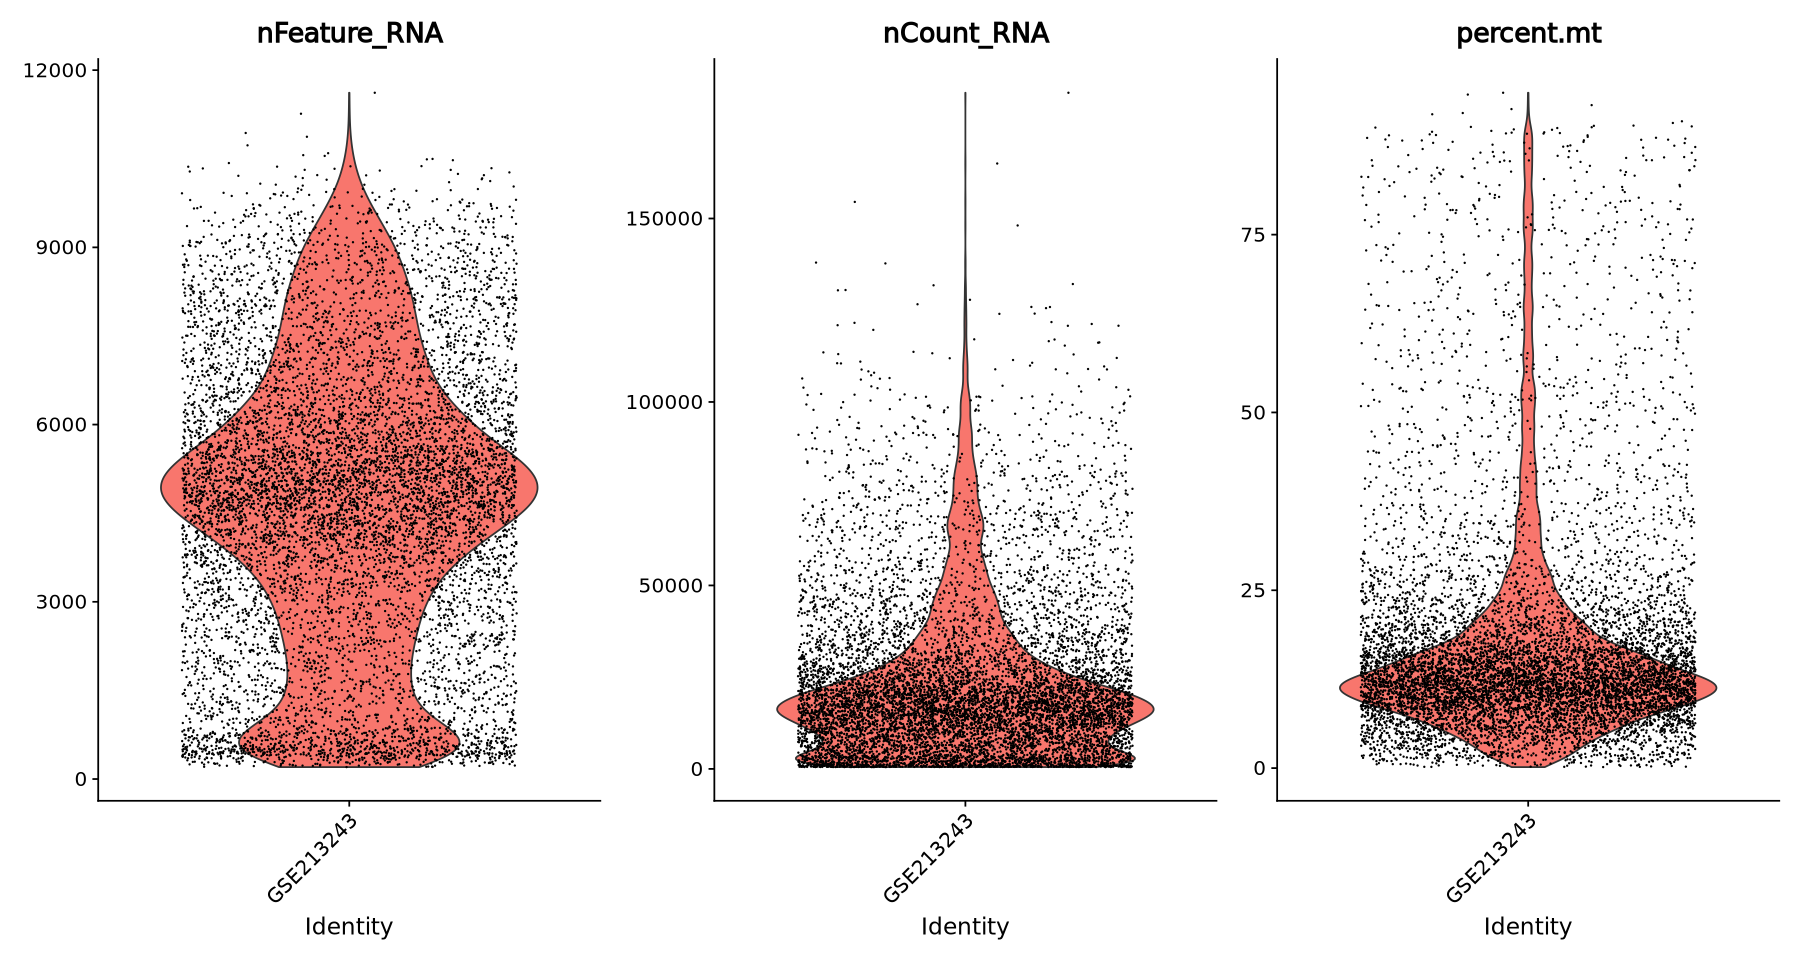

In [9]:
#QC Steps 
OC[["percent.mt"]] <- PercentageFeatureSet(OC, pattern = "^MT-")
#Visualise QC metrics
options(repr.plot.height=8, repr.plot.width=15)
VlnPlot(OC, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [10]:
#Normalise the data
OC <- NormalizeData(OC)
#Find variable features
OC <- FindVariableFeatures(OC, selection.method = "vst", nfeatures = 2000)
#Scale the data
OC <- ScaleData(OC, vars.to.regress = c("percent.mt", "nCount_RNA"))
#Run pca
OC <- RunPCA(OC, features = VariableFeatures(object = OC))

Normalizing layer: counts

Finding variable features for layer counts

Regressing out percent.mt, nCount_RNA

Centering and scaling data matrix

PC_ 1 
Positive:  LAPTM5, TYROBP, FCER1G, SRGN, ITGB2, AIF1, RGS1, VIM, CD14, FCGRT 
	   TGFBI, C1QA, C1QC, SPP1, SPI1, MSR1, MS4A7, PLEK, FYB1, ZEB2 
	   ADAP2, LSP1, DAB2, GPNMB, FCGR2A, C1QB, CSF1R, EMP3, APOE, PTPRC 
Negative:  S100A13, CAPS, LEMD1, CTXN1, CHI3L1, MORN2, SLPI, MDK, IGFBP2, CLU 
	   TSPAN1, DNALI1, SMIM22, IGFBP5, METRN, RPL39L, RSPH1, C9orf116, STXBP6, ASRGL1 
	   SNHG29, CCDC74A, MACROD2, KIF9, KCNK15, C2orf88, PCSK1N, LPAR3, RBP1, TUBB4B 
PC_ 2 
Positive:  CENPW, IGFBP2, MARCKSL1, SNHG29, ZFAS1, MDK, MKI67, BIRC5, TPX2, PTTG1 
	   AQP5, CHI3L1, LEMD1, HMMR, CKS2, CDKN3, FGF18, ENHO, UBE2C, CALD1 
	   FOXM1, ASPM, GTSE1, CDCA3, CENPA, SNHG7, KRT19, CDCA8, MEX3A, TOP2A 
Negative:  C20orf85, CAPSL, C5orf49, MORN5, TUBA4B, CFAP126, FAM183A, WDR38, C1orf194, TEKT1 
	   CFAP45, RIIAD1, PIFO, GPR162, EFCAB1, ZMYND10, ROPN1L, RS

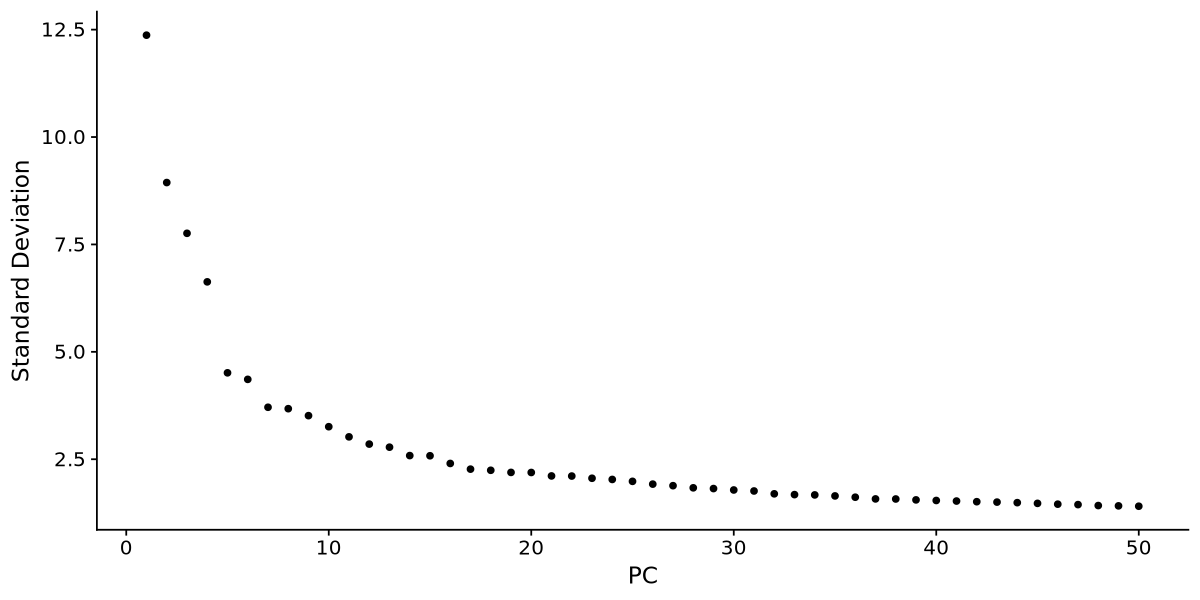

In [11]:
#make elbow plot
options(repr.plot.height=5, repr.plot.width=10)
ElbowPlot(OC, ndims=50)
#using 40

In [12]:
#Find neighbours (make sure number matches no. features chosen above)
OC <- FindNeighbors(OC, dims = 1:40)

Computing nearest neighbor graph

Computing SNN



In [13]:
#Run UMAP
OC <- RunUMAP(OC, dims = 1:40)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
12:55:36 UMAP embedding parameters a = 0.9922 b = 1.112

12:55:36 Read 9218 rows and found 40 numeric columns

12:55:36 Using Annoy for neighbor search, n_neighbors = 30

12:55:36 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

12:55:36 Writing NN index file to temp file /scratch/temp/9148248/Rtmpu89sSM/file7221755e54524

12:55:36 Searching Annoy index using 1 thread, search_k = 3000

12:55:38 Annoy recall = 100%

12:55:38 Commencing smooth kNN distance calibration using 1 thread
 with ta

In [14]:
#Cluster, resolution here set to 0.5
OC <- FindClusters(OC, resolution = 0.5)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 9218
Number of edges: 339486

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8858
Number of communities: 14
Elapsed time: 0 seconds


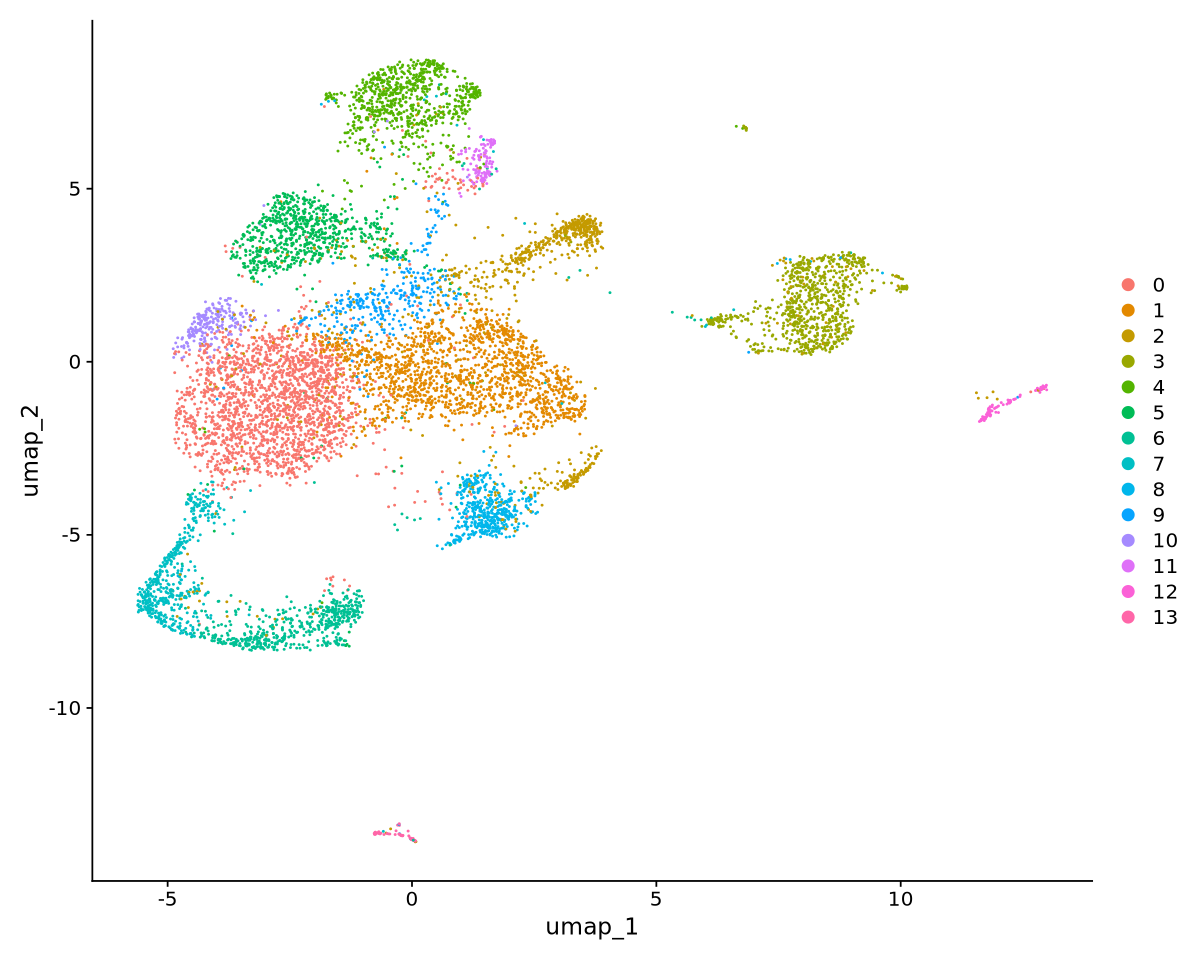

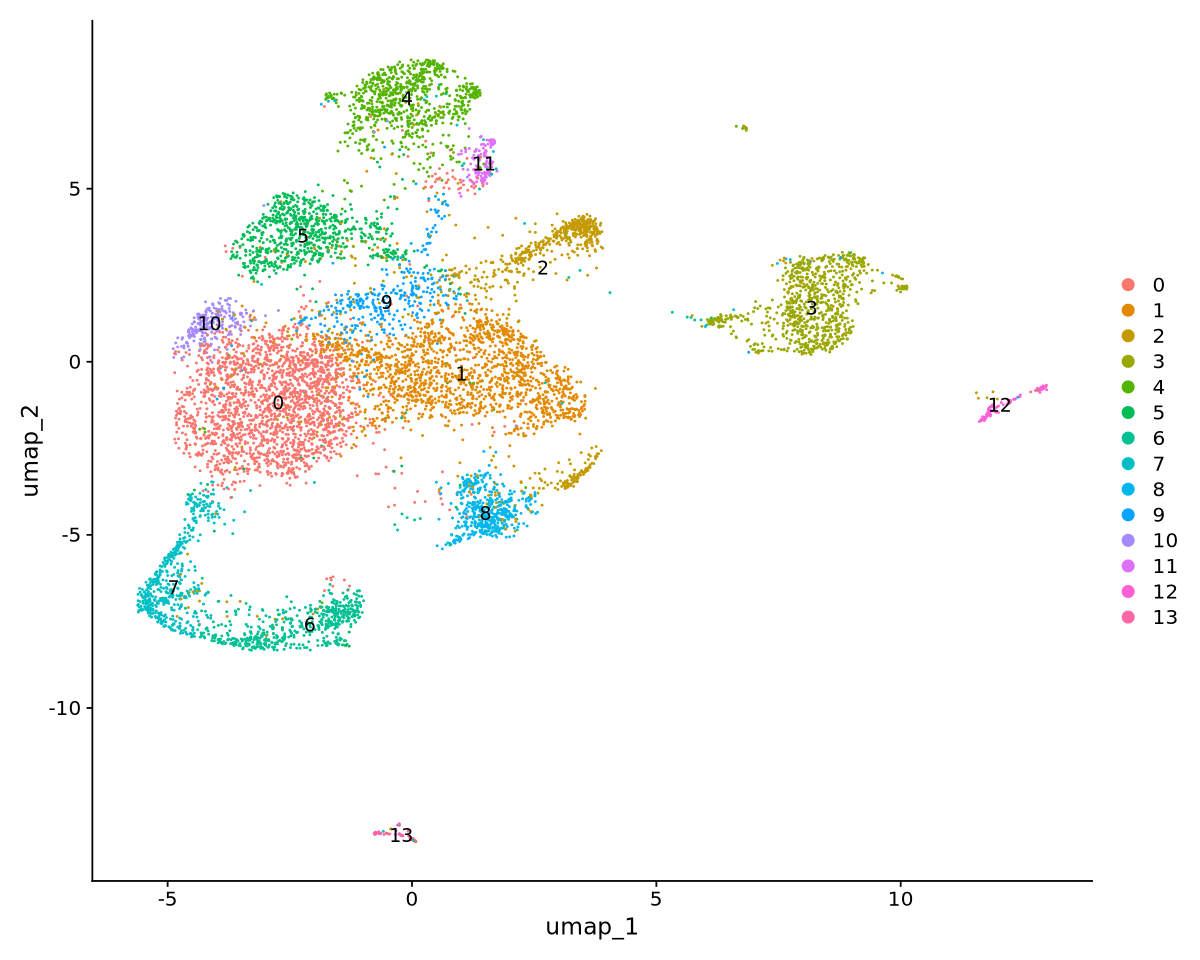

In [15]:
#Plot UMAP
options(repr.plot.height=8, repr.plot.width=10)
DimPlot(OC, reduction = "umap")
DimPlot(OC, reduction = "umap", label=TRUE)

In [16]:
#Save the object at this point so it can be loaded in without running steps above
saveRDS(OC, file = "/scratch/user/s4436039/scdata/GSE213243/GSE213243.RDS")

#### Next part of code is about determining which cluster is the myeloid cells

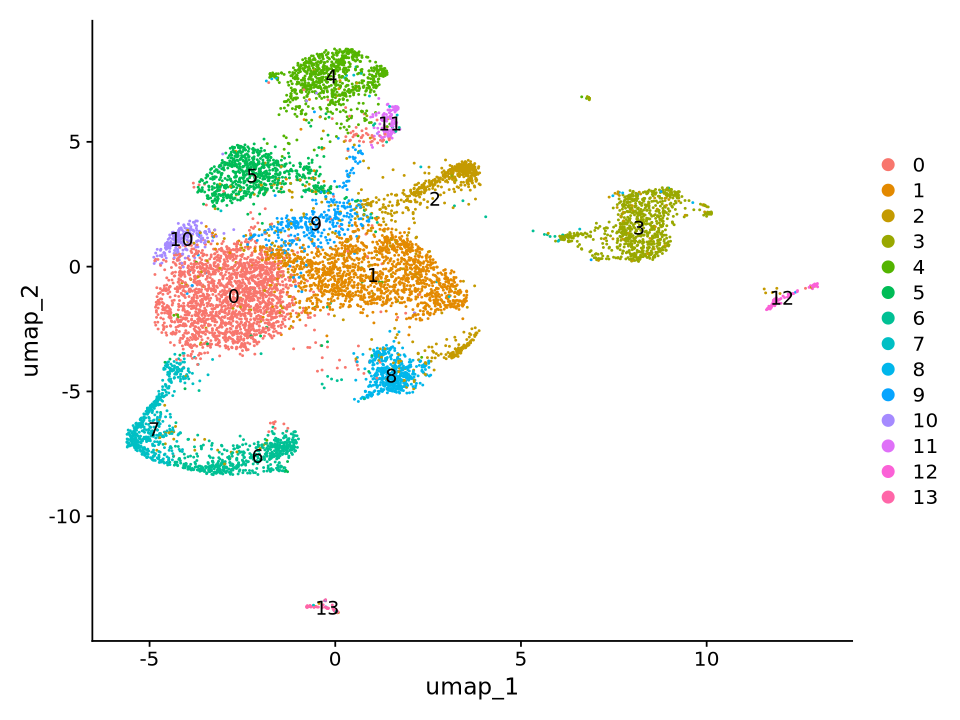

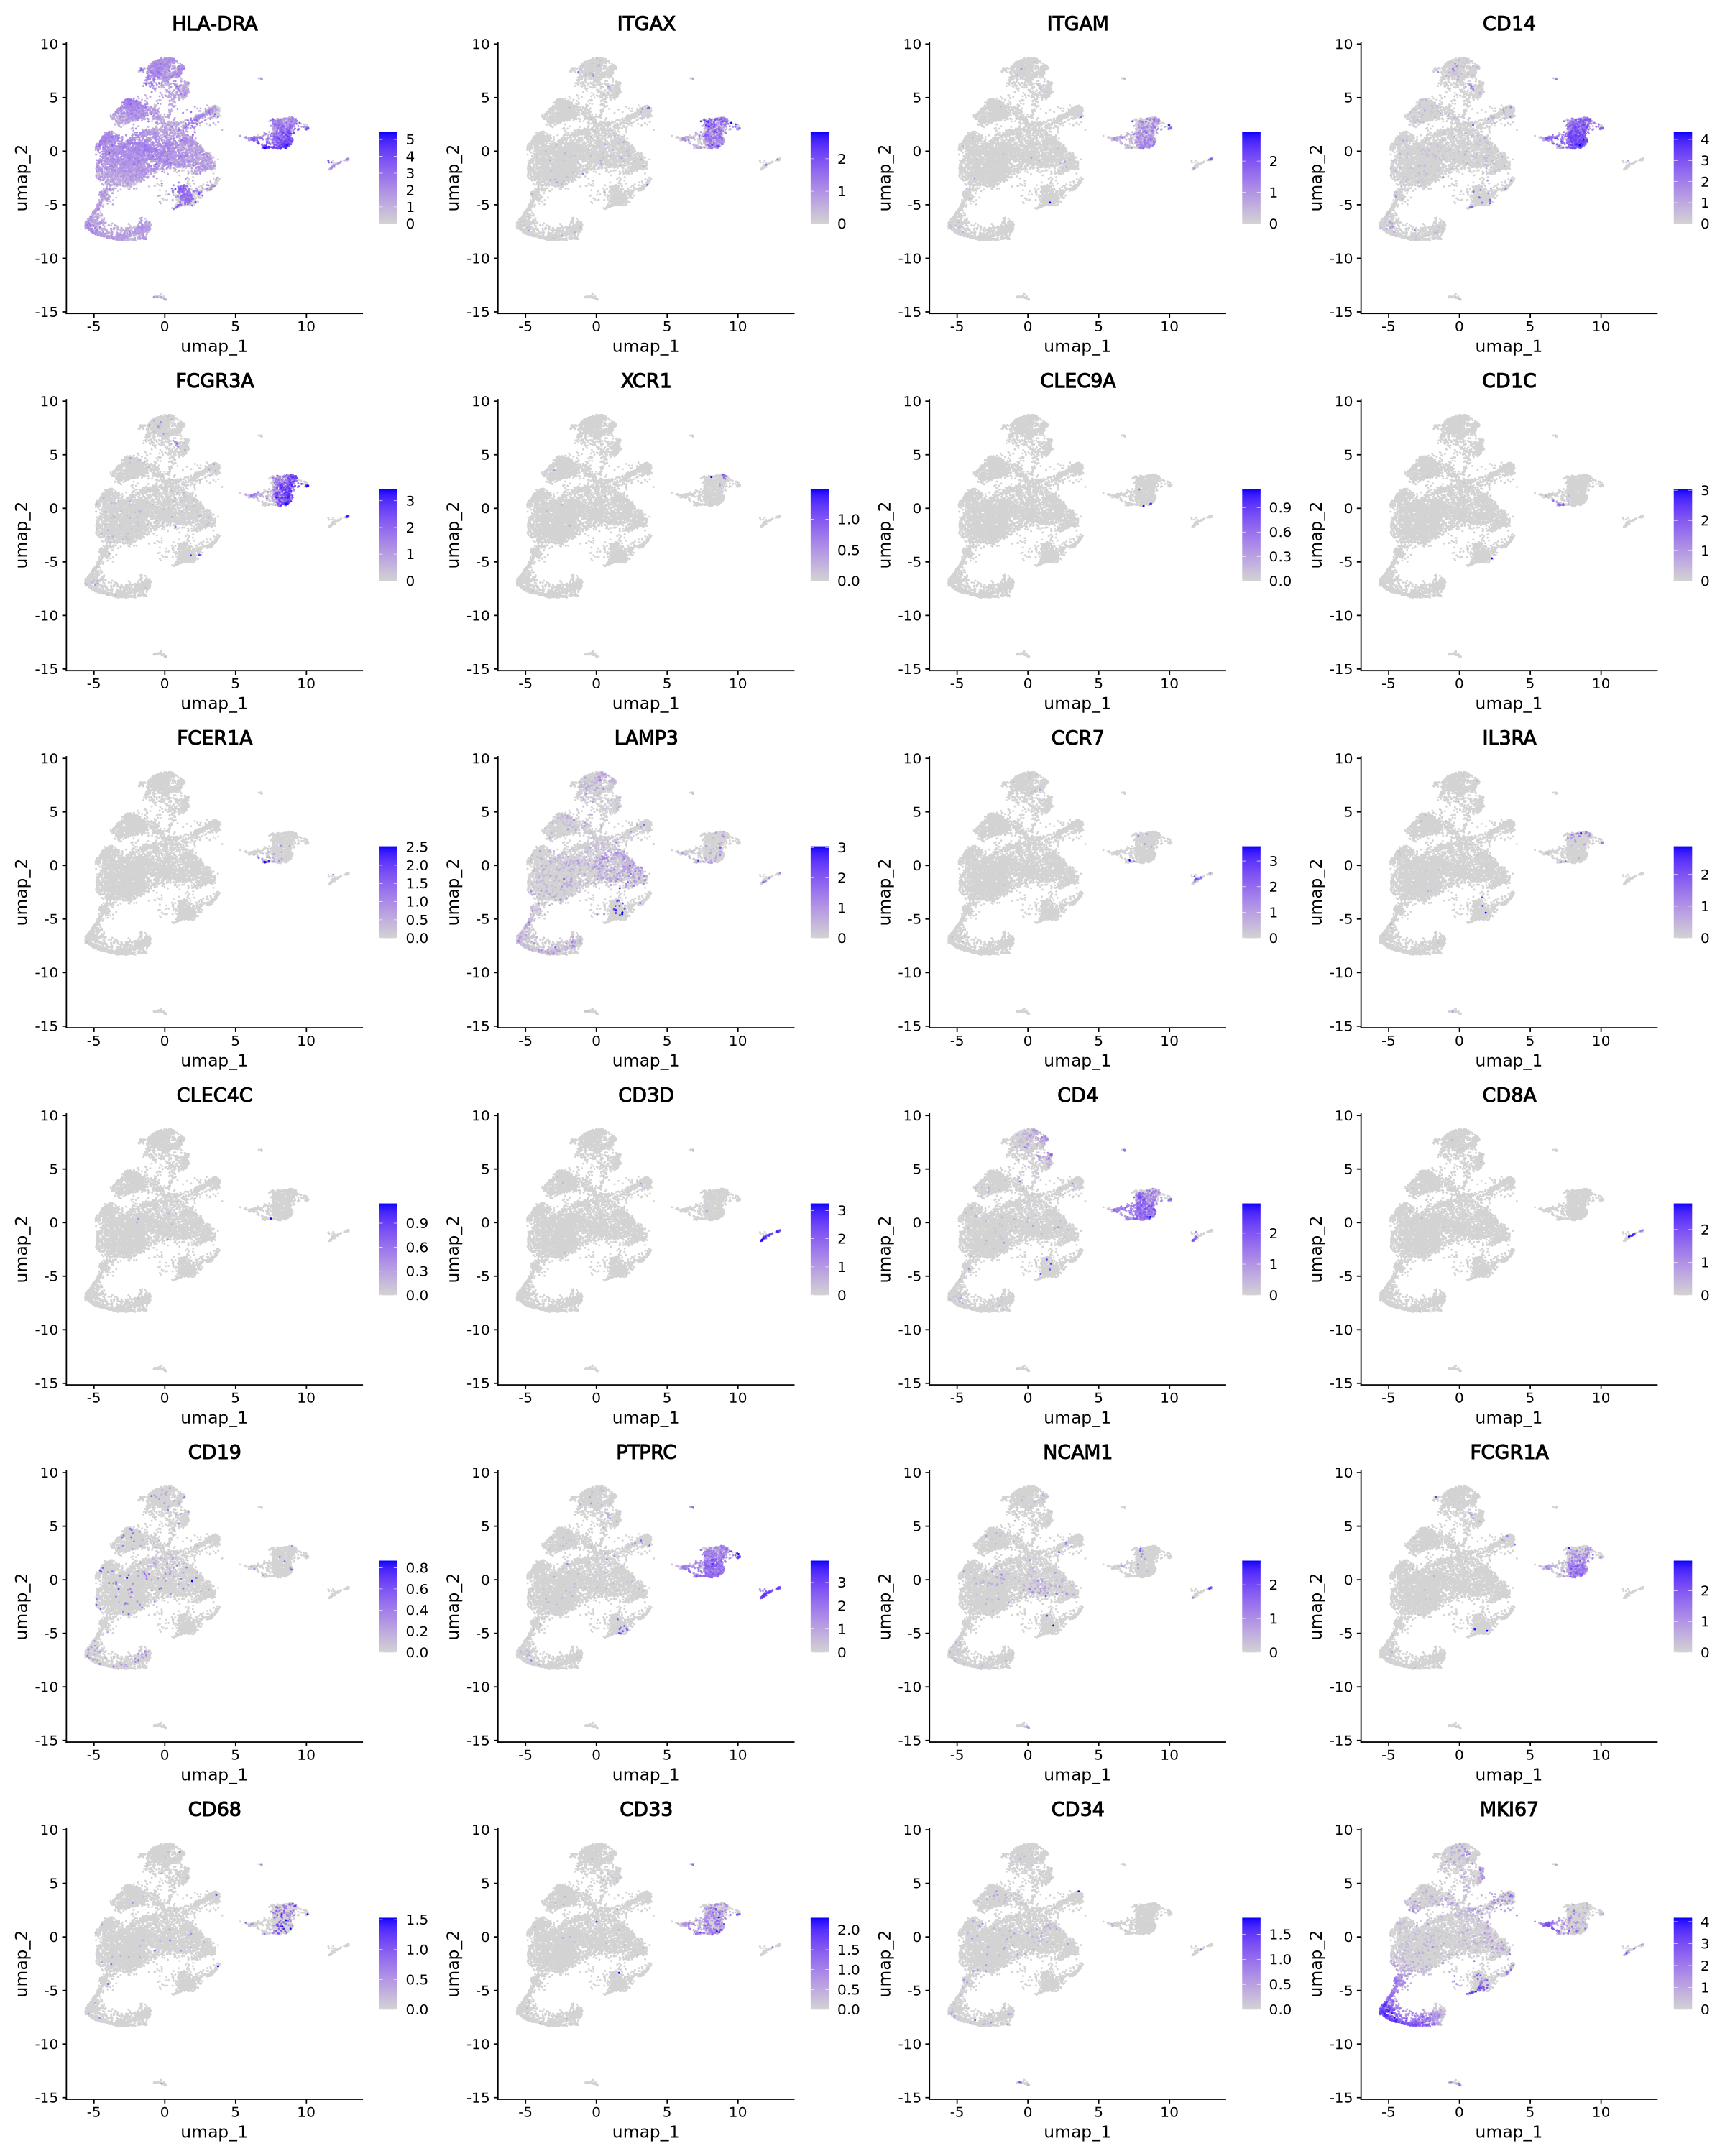

In [17]:
#Same genes over UMAP
options(repr.plot.height=6, repr.plot.width=8)
DimPlot(OC, reduction = "umap", label=TRUE)

options(repr.plot.height=25, repr.plot.width=20)
FeaturePlot(OC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67"), order = TRUE)

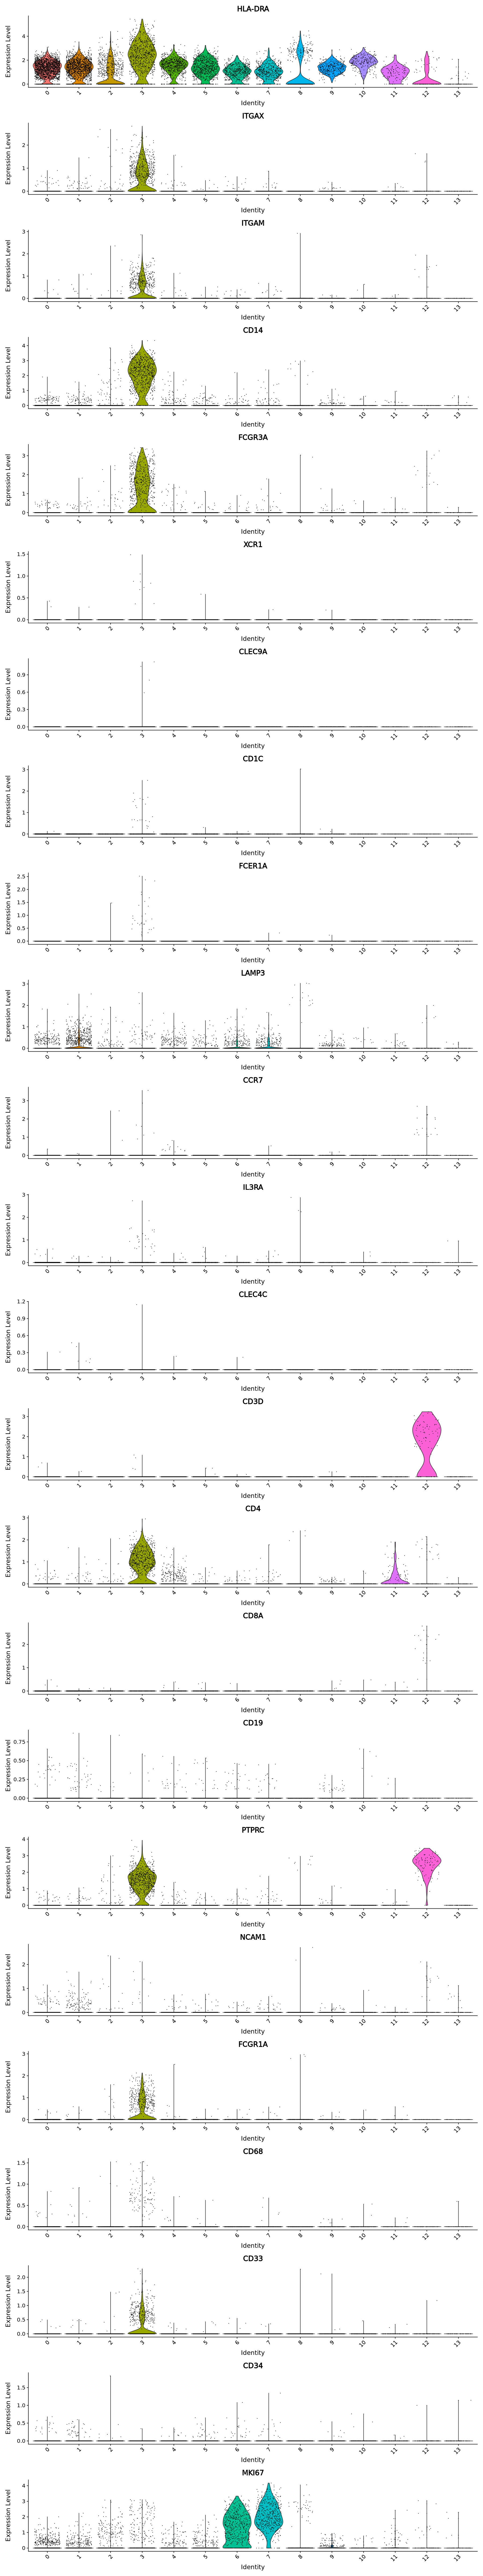

In [18]:
#Violin plots of classic markers
options(repr.plot.height=80, repr.plot.width=15)
VlnPlot(OC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67"), ncol=1)

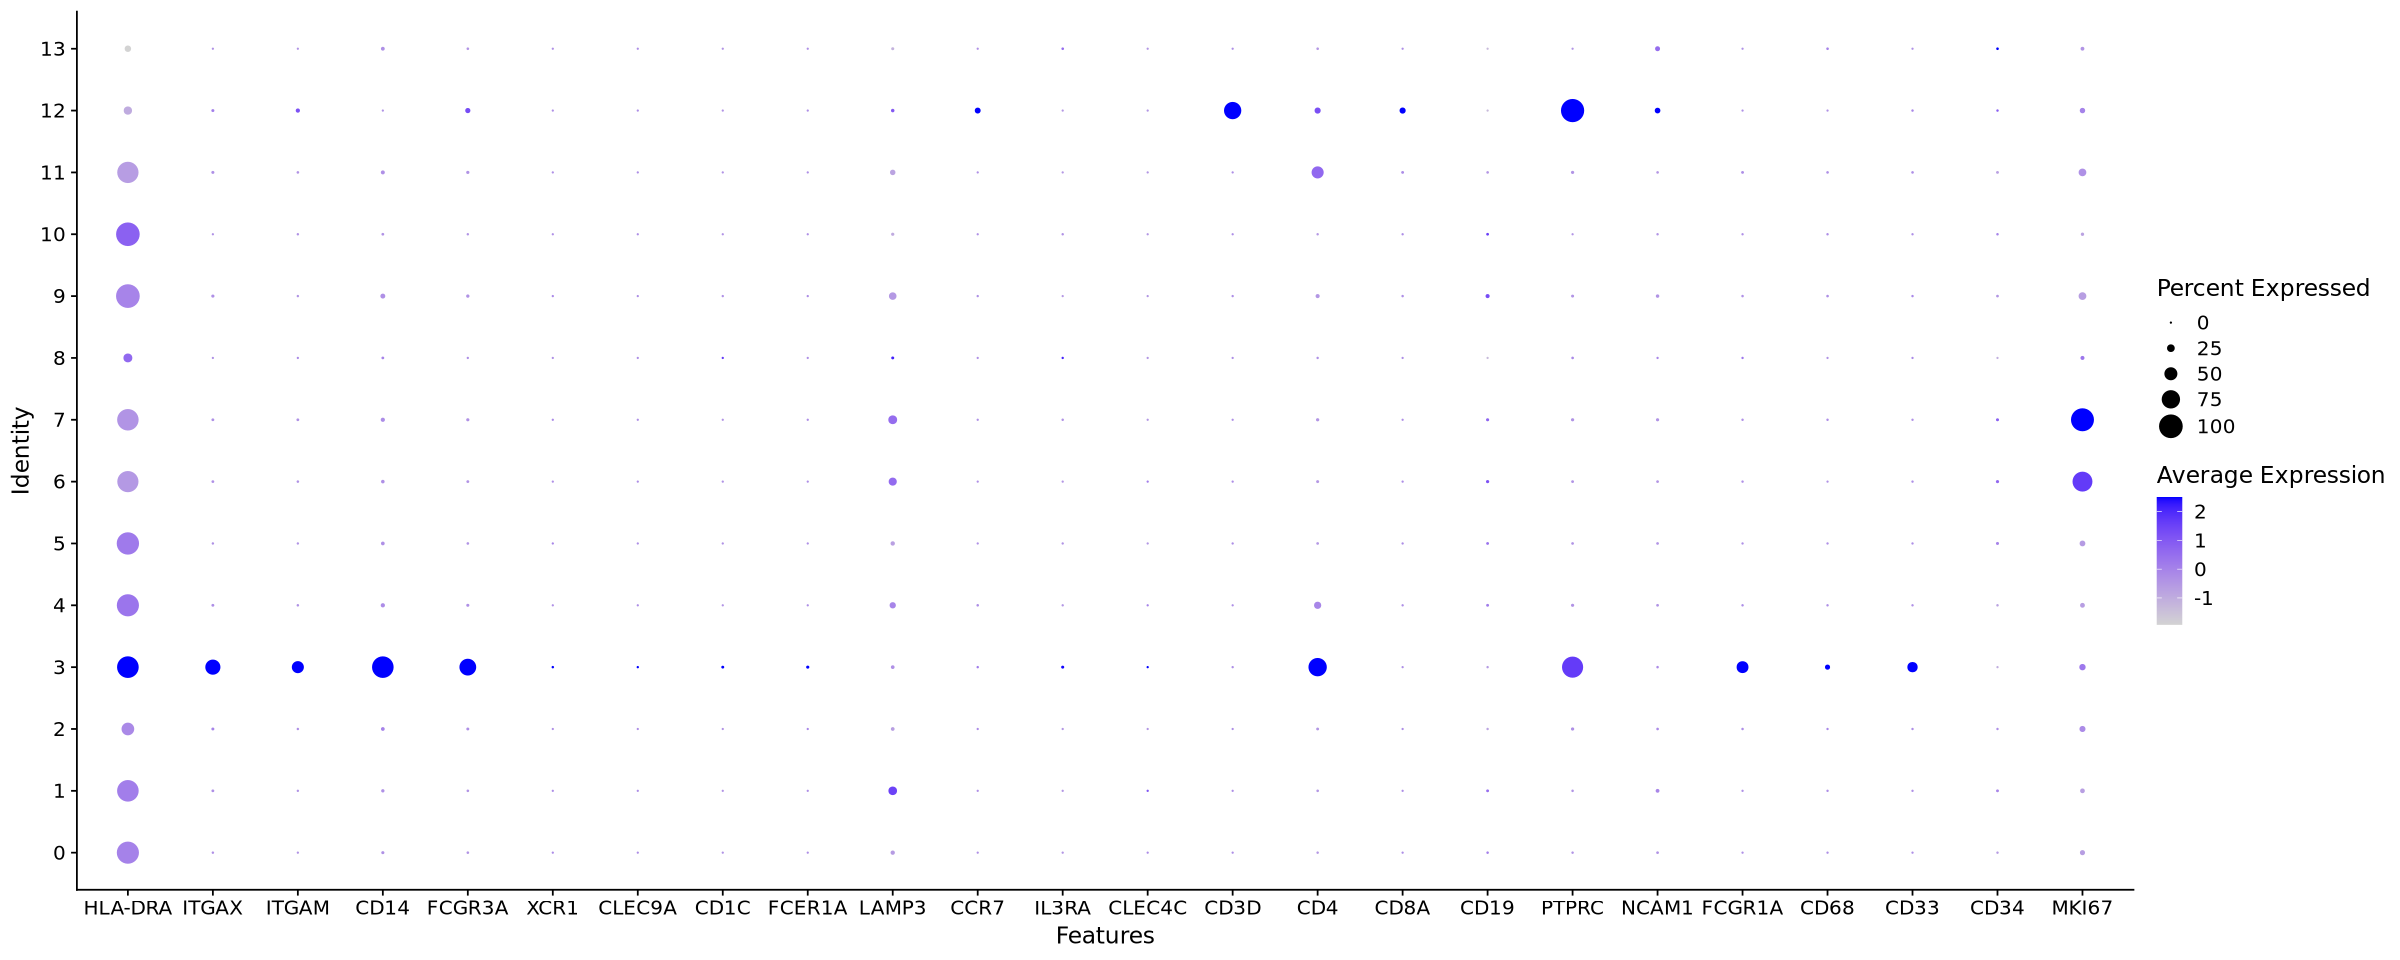

In [19]:
#Same as above but dot plot
options(repr.plot.height=8, repr.plot.width=20)
DotPlot(OC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67"))

#### From above it looks like cluster 3 is the myeloid cells, now subsetting out cluster 3

In [20]:
head(OC@meta.data)

orig.ident nCount_RNA nFeature_RNA
GSE213243_S1_tumour_AAACCCAAGCATGTTC-1 GSE213243    662       511        
GSE213243_S1_tumour_AAACCCACAAGCAATA-1 GSE213243  32154      5908        
GSE213243_S1_tumour_AAACCCAGTCGTCAGC-1 GSE213243  12781      4054        
GSE213243_S1_tumour_AAACCCAGTGACGTCC-1 GSE213243    557       402        
GSE213243_S1_tumour_AAACCCATCACAAGAA-1 GSE213243  20367      5210        
GSE213243_S1_tumour_AAACCCATCCGTATAG-1 GSE213243   7222      2839        
                                       sample_type cancer_type patient_id
GSE213243_S1_tumour_AAACCCAAGCATGTTC-1 tumour      HGSOC       S1_tumour 
GSE213243_S1_tumour_AAACCCACAAGCAATA-1 tumour      HGSOC       S1_tumour 
GSE213243_S1_tumour_AAACCCAGTCGTCAGC-1 tumour      HGSOC       S1_tumour 
GSE213243_S1_tumour_AAACCCAGTGACGTCC-1 tumour      HGSOC       S1_tumour 
GSE213243_S1_tumour_AAACCCATCACAAGAA-1 tumour      HGSOC       S1_tumour 
GSE213243_S1_tumour_AAACCCATCCGTATAG-1 tumour      HGSOC       S1_tumour 
                                       sample_id                 percent.mt
GSE213243_S1_tumour_AAACCCAAGCATGTTC-1 GSE213243_HGSOC_S1_tumour  3.172205 
GSE213243_S1_tumour_AAACCCACAAGCAATA-1 GSE213243_HGSOC_S1_tumour 14.539404 
GSE213243_S1_tumour_AAACCCAGTCGTCAGC-1 GSE213243_HGSOC_S1_tumour 10.241765 
GSE213243_S1_tumour_AAACCCAGTGACGTCC-1 GSE213243_HGSOC_S1_tumour  8.078995 
GSE213243_S1_tumour_AAACCCATCACAAGAA-1 GSE213243_HGSOC_S1_tumour 16.266510 
GSE213243_S1_tumour_AAACCCATCCGTATAG-1 GSE213243_HGSOC_S1_tumour 15.951260 
                                       RNA_snn_res.0.5 seurat_clusters
GSE213243_S1_tumour_AAACCCAAGCATGTTC-1 8               8              
GSE213243_S1_tumour_AAACCCACAAGCAATA-1 0               0              
GSE213243_S1_tumour_AAACCCAGTCGTCAGC-1 7               7              
GSE213243_S1_tumour_AAACCCAGTGACGTCC-1 8               8              
GSE213243_S1_tumour_AAACCCATCACAAGAA-1 0               0              
GSE213243_S1_tumour_AAACCCATCCGTATAG-1 7               7

In [21]:
myeloid_OC <- subset(OC, subset = RNA_snn_res.0.5 %in% c("3"))

In [22]:
myeloid_OC

An object of class Seurat 
58825 features across 804 samples within 1 assay 
Active assay: RNA (58825 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap

In [23]:
saveRDS(myeloid_OC, "/scratch/user/s4436039/scdata/GSE213243/GSE213243_myeloid.RDS")

#### Following the above then need to move entire GSE184880 folder from scratch to rdm
``` bash
rsync -azvhp /scratch/user/s4436039/scdata/GSE213243/ /QRISdata/Q5935/nikita/scdata/GSE213243
```